# BUILD A REGRESSION MODEL.

Data to use is `merged_dfx` that has been cleaned. do another check just to confirm

In [1]:
# Importing the required libraries for EDA

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import statsmodels.api as sm
import seaborn
seaborn.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataframe
bld_reg = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\combsql1.0_df.csv')

bld_reg.head()

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,20.0
1,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,27.0
2,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,0.0
3,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,12.0
4,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,16.0


In [4]:
bld_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8630 non-null   object 
 1   Categories     8630 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8630 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      8630 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 606.9+ KB


In [5]:
bld_reg.shape

(8630, 9)

In [7]:
# Checking for duplicates
duplicate_rows_bld_reg = bld_reg[bld_reg.duplicated()]
print("number of duplicate rows: ", duplicate_rows_bld_reg.shape)

number of duplicate rows:  (1789, 9)


In [8]:
# Create a copy of dataframe
bld_reg_jk = bld_reg.copy()
bld_reg_jk

# bu_reg_x = bu_reg_x.drop_duplicates()
# bu_reg_x.tail()

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,20.00
1,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,27.00
2,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,0.00
3,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,12.00
4,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,16.00
...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.50,4.00,18.19
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",604.11,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.65,3.10,2.00,8.00,18.19
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.50,3.00,18.19
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.50,2.00,18.19


In [9]:
# Checking for duplicates
duplicate_rows_bld_reg_jk = bld_reg_jk[bld_reg_jk.duplicated()]
print("number of duplicate rows: ", duplicate_rows_bld_reg_jk.shape)



number of duplicate rows:  (1789, 9)


In [10]:
# Drop duplicates
bld_reg_jk = bld_reg_jk.drop_duplicates()
bld_reg_jk.tail()

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
8623,CHATELLENIE,"Fast Food, Food Delivery Services",886.00,"214 Rue De La Convention, 59650 Villeneuve D A...",50.64,3.15,3.5,9.0,18.19
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.5,4.0,18.19
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.5,3.0,18.19
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.5,2.0,18.19
8629,CHATELLENIE,"Bistros, Wine Bars",1224.45,"Centre sportif OCEA, 51 rue de la Cimaise, 596...",50.64,3.15,3.5,2.0,18.19


In [11]:
# Checking for duplicates
duplicate_rows_bld_reg_jk = bld_reg_jk[bld_reg_jk.duplicated()]
print("number of duplicate rows: ", duplicate_rows_bld_reg_jk.shape)

number of duplicate rows:  (0, 9)


In [12]:
bld_reg = bld_reg_jk
bld_reg

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,20.00
1,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,27.00
2,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,0.00
3,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,12.00
4,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,16.00
...,...,...,...,...,...,...,...,...,...
8623,CHATELLENIE,"Fast Food, Food Delivery Services",886.00,"214 Rue De La Convention, 59650 Villeneuve D A...",50.64,3.15,3.50,9.00,18.19
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.50,4.00,18.19
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.50,3.00,18.19
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.50,2.00,18.19


In [13]:
del bld_reg_jk

In [14]:
# Checking for missing or null values.

print("\nMissing Values:")
print(bld_reg.isnull().sum())   # Before dropping the values


Missing Values:
Station_names    0
Categories       0
Distance         0
Address          0
Latitude         0
Longitude        0
Rating           0
Review_count     0
Total Bikes      0
dtype: int64


In [15]:
bld_reg.shape

(6841, 9)

No missing values

In [16]:
bld_reg.describe()

,Distance,Latitude,Longitude,Rating,Review_count,Total Bikes
count,6841.000000,6841.000000,6841.000000,6841.000000,6841.000000,6841.000000
mean,604.112922,50.651266,3.098297,4.071668,17.183988,18.204606
std,303.863659,0.031201,0.051257,0.457620,13.387899,0.771894
min,3.150000,50.600000,2.970000,1.000000,1.000000,0.000000
25%,363.990000,50.630000,3.060000,3.990000,5.000000,18.190000
50%,604.110000,50.640000,3.080000,3.990000,23.530000,18.190000
75%,843.250000,50.670000,3.150000,4.500000,23.530000,18.190000
max,1644.440000,50.730000,3.230000,5.000000,214.000000,40.000000


# EXPLORATORY DATA ANALYSIS

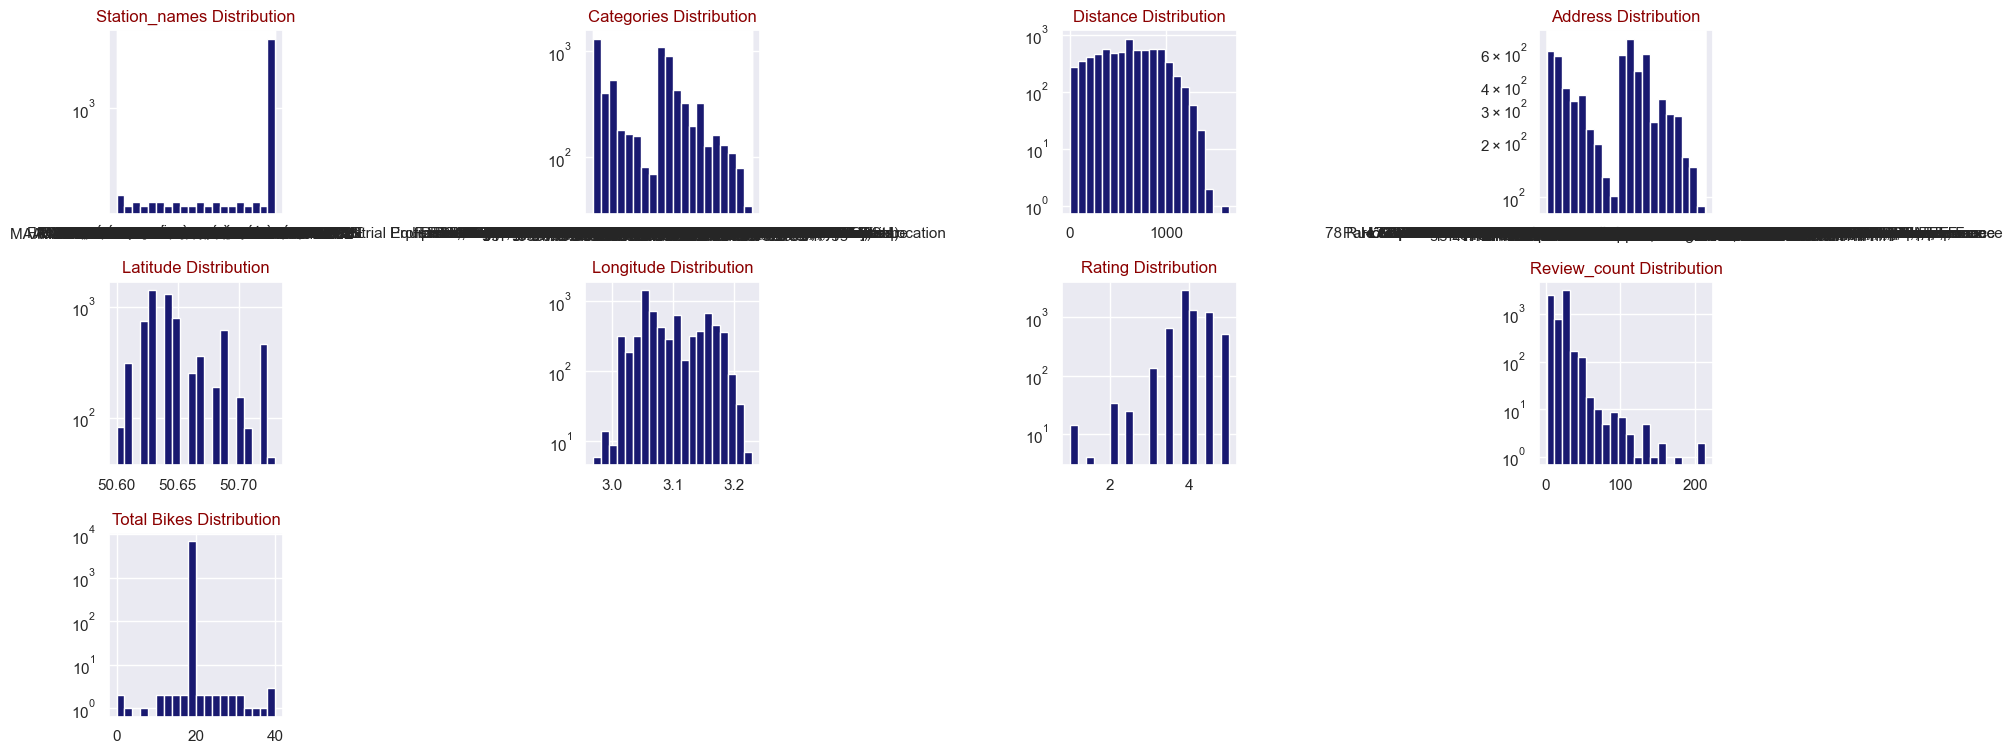

In [17]:
# Histogram distribution for dataframe
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(bld_reg,bld_reg.columns,8,4)

In [18]:
bld_reg['Total Bikes'].value_counts()

18.19    6809
25.00       1
35.00       1
7.00        1
28.00       1
22.00       1
21.00       1
13.00       1
29.00       1
1.00        1
40.00       1
15.00       1
38.00       1
26.00       1
31.00       1
39.00       1
20.00       1
27.00       1
36.00       1
17.00       1
32.00       1
10.00       1
19.00       1
18.00       1
30.00       1
11.00       1
14.00       1
24.00       1
23.00       1
16.00       1
12.00       1
0.00        1
3.00        1
Name: Total Bikes, dtype: int64

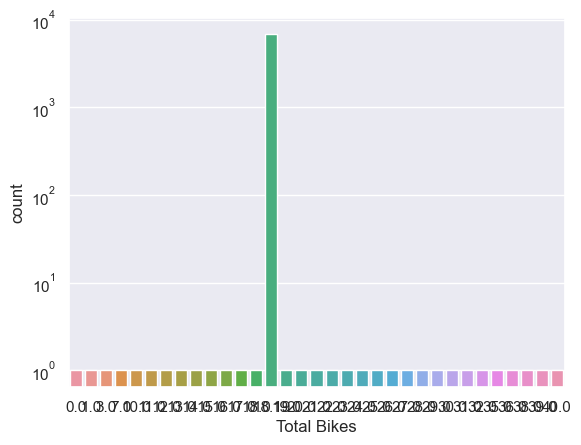

In [19]:
ax=sns.countplot(x='Total Bikes',data=bld_reg);
ax.set_yscale('log')

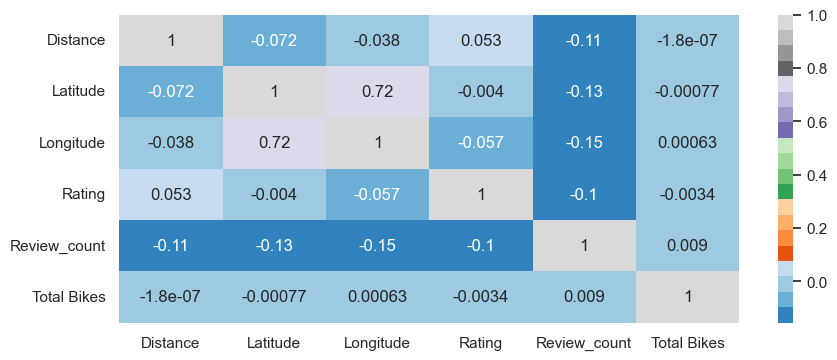

In [20]:
plt.figure(figsize = (10,4))
sns.heatmap(bld_reg.corr(), annot = True, cmap="tab20c")
plt.show()

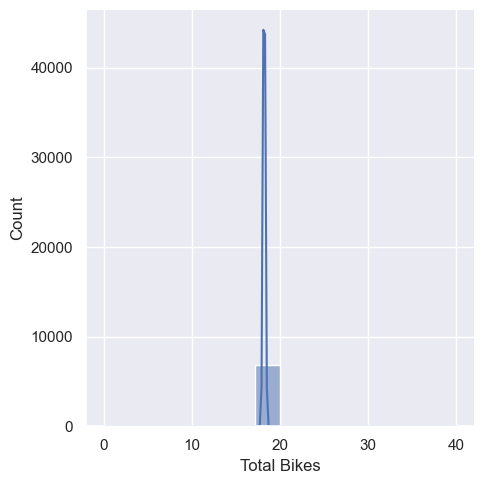

In [50]:
# descriptive statistics

bld_reg['Total Bikes'].describe()

# histogram
#sns.displot(df_train['SalePrice']) # x="total_bill", col="time", kde=True)
sns.displot(bld_reg, x='Total Bikes', kde=True)
#sns.histplot(df_train['SalePrice'])

# LINEAR REGRESSION MODEL

In [46]:
import statsmodels.api as sm

# Define your dependent variable (continuous target) and independent variables
y = bld_reg['Total Bikes']
X = bld_reg[['Rating', 'Distance', 'Latitude', 'Longitude','Review_count']]

# Add a constant term for the intercept in the linear regression model
X = sm.add_constant(X)

# Build the linear regression model
linear_model = sm.OLS(y, X).fit()

# Interpret and print the results
print(linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:            Total Bikes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1275
Date:                Thu, 28 Sep 2023   Prob (F-statistic):              0.986
Time:                        10:22:37   Log-Likelihood:                -7935.0
No. Observations:                6841   AIC:                         1.588e+04
Df Residuals:                    6835   BIC:                         1.592e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.5412     21.446      0.958   

The regression summary shows the results of a linear regression model. Let's go through the key statistics and interpretations:

1. R-squared (R²): R-squared measures the proportion of the variance in the dependent variable (Total Bikes) that is explained by the independent variables (Rating, Distance, Latitude, Longitude, Review_count). In this case, R-squared is very close to 0 (0.000), which indicates that the model does not explain much of the variance in Total Bikes. It suggests that the independent variables may not be strong predictors of Total Bikes in a linear relationship.

2. Coefficient (coef): These values represent the estimated coefficients for each independent variable. They indicate the change in the dependent variable (Total Bikes) for a one-unit change in the corresponding independent variable, while holding other variables constant. For example, for Rating, a one-unit increase in Rating is associated with a -0.0039 decrease in Total Bikes, but this coefficient is not statistically significant (P>|t| > 0.05).

3. P-value (P>|t|): P-values test the null hypothesis that a given coefficient is equal to zero. A low P-value (typically less than 0.05) suggests that the independent variable is statistically significant in predicting the dependent variable. In this case, none of the independent variables have P-values below 0.05, indicating that none of them are statistically significant predictors.

4. Adjusted R-squared (Adj. R²): This adjusts the R-squared value for the number of predictors in the model. In your case, it's also very close to 0, suggesting that adding more independent variables did not improve the model's explanatory power.

5. F-statistic (F-statistic): The F-statistic tests the overall significance of the regression model. A low F-statistic suggests that the model as a whole is not significant. In your case, the F-statistic is low, and the associated probability (Prob (F-statistic)) is close to 1, indicating that the model is not significant.

6. Residuals: The Omnibus, Durbin-Watson, Jarque-Bera, and Kurtosis statistics are related to the properties of the residuals (errors). These statistics are important for assessing the model's assumptions and checking for issues like heteroscedasticity and normality of residuals.

7. Condition Number (Cond. No.): A large condition number suggests potential multicollinearity among the independent variables. This means that some independent variables may be highly correlated with each other, which can make it challenging to interpret individual coefficients. It's essential to check for multicollinearity and consider variable selection or transformation to address this issue.

To fix the model, consider the following:

1. Feature Selection: Review the choice of independent variables and consider whether they are the most appropriate predictors for Total Bikes. You may need to select different features or engineer new ones.

2. Model Selection: If a linear regression model is not suitable for your data, consider other regression techniques or machine learning algorithms that can capture more complex relationships.

3. Data Transformation: Consider data transformation techniques like scaling, normalizing, or encoding categorical variables, if applicable.

4. Outlier Handling: Check for outliers in the data and decide whether to remove or transform them if they are affecting the model's performance.

5. Residual Analysis: Examine the residuals to ensure that the model assumptions (e.g., homoscedasticity, normality) are met or consider alternative models that better fit the data.

Improving a regression model often involves an iterative process of data exploration, feature engineering, and model refinement.

In [47]:
import pandas as pd

# Sample data in X1 with a categorical variable 'Category'
bld_reg_dm = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'C']
}

X1 = pd.DataFrame(bld_reg_dm)

# One-Hot Encoding
X1_onehot = pd.get_dummies(X1, columns=['Category'], prefix=['Category'])

# Label Encoding
from sklearn.preprocessing import LabelEncoder

X1_label = X1.copy()
label_encoder = LabelEncoder()
X1_label['Category'] = label_encoder.fit_transform(X1_label['Category'])

# Display the encoded DataFrames
print("One-Hot Encoding:")
print(X1_onehot)

print("\nLabel Encoding:")
print(X1_label)


One-Hot Encoding:
   Category_A  Category_B  Category_C
0           1           0           0
1           0           1           0
2           1           0           0
3           0           0           1
4           0           1           0
5           0           0           1

Label Encoding:
   Category
0         0
1         1
2         0
3         2
4         1
5         2


In [48]:
import statsmodels.api as sm

# Assuming you have your dependent variable 'y' prepared
y = 'Total Bikes'

# Logistic Regression with One-Hot Encoding
X_onehot = sm.add_constant(X1_onehot)  # Add a constant (intercept)
logit_model_onehot = sm.Logit(y, X_onehot)
results_onehot = logit_model_onehot.fit()
print(results_onehot.summary())

# Logistic Regression with Label Encoding
X_label = sm.add_constant(X1_label)  # Add a constant (intercept)
logit_model_label = sm.Logit(y, X_label)
results_label = logit_model_label.fit()
print(results_label.summary())


TypeError: len() of unsized object

In [53]:
'''
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.0001):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(bld_regx_dm, bld_regx_dm.Total Bikes, col)
'''

'\ndef back_feature_elem (data_frame,dep_var,col_list):\n    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest\n    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""\n\n    while len(col_list)>0 :\n        model=sm.Logit(dep_var,data_frame[col_list])\n        result=model.fit(disp=0)\n        largest_pvalue=round(result.pvalues,3).nlargest(1)\n        if largest_pvalue[0]<(0.0001):\n            return result\n            break\n        else:\n            col_list=col_list.drop(largest_pvalue.index)\n\nresult=back_feature_elem(bld_regx_dm, bld_regx_dm.Total Bikes, col)\n'

Provide model output and an interpretation of the results. 

# Stretch

How can you turn the regression model into a classification model?